In [8]:
import pandas as pd

df = pd.read_csv('CreditRisk.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Applicant_ID       676 non-null    int64  
 1   Credit_Score       676 non-null    int64  
 2   Late_Payments      676 non-null    int64  
 3   Months_In_Job      676 non-null    int64  
 4   Debt_Income_Ratio  676 non-null    float64
 5   Loan_Amt           676 non-null    int64  
 6   Liquid_Assets      676 non-null    int64  
 7   Num_Credit_Lines   676 non-null    int64  
 8   Credit_Risk        676 non-null    object 
dtypes: float64(1), int64(7), object(1)
memory usage: 47.7+ KB


In [9]:
df

,Applicant_ID,Credit_Score,Late_Payments,Months_In_Job,Debt_Income_Ratio,Loan_Amt,Liquid_Assets,Num_Credit_Lines,Credit_Risk
0,744488,607,5,29,3.414,103519,2696,6,Moderate
1,350833,533,8,21,3.737,74868,5336,8,Moderate
2,466037,474,12,25,5.061,93468,1785,4,High
3,721737,551,13,3,5.926,41708,2104,10,High
4,455703,768,0,13,1.910,318995,11523,3,Low
...,...,...,...,...,...,...,...,...,...
671,530309,438,15,5,7.894,101966,945,5,High
672,510750,511,4,5,8.640,42658,3648,4,High
673,425474,823,0,76,0.250,302845,24699,1,Very Low
674,872263,451,15,21,3.362,52330,1223,9,High


In [11]:
X = df.drop(['Applicant_ID','Credit_Risk'], axis=1)
y = df['Credit_Risk']

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()

tree_model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

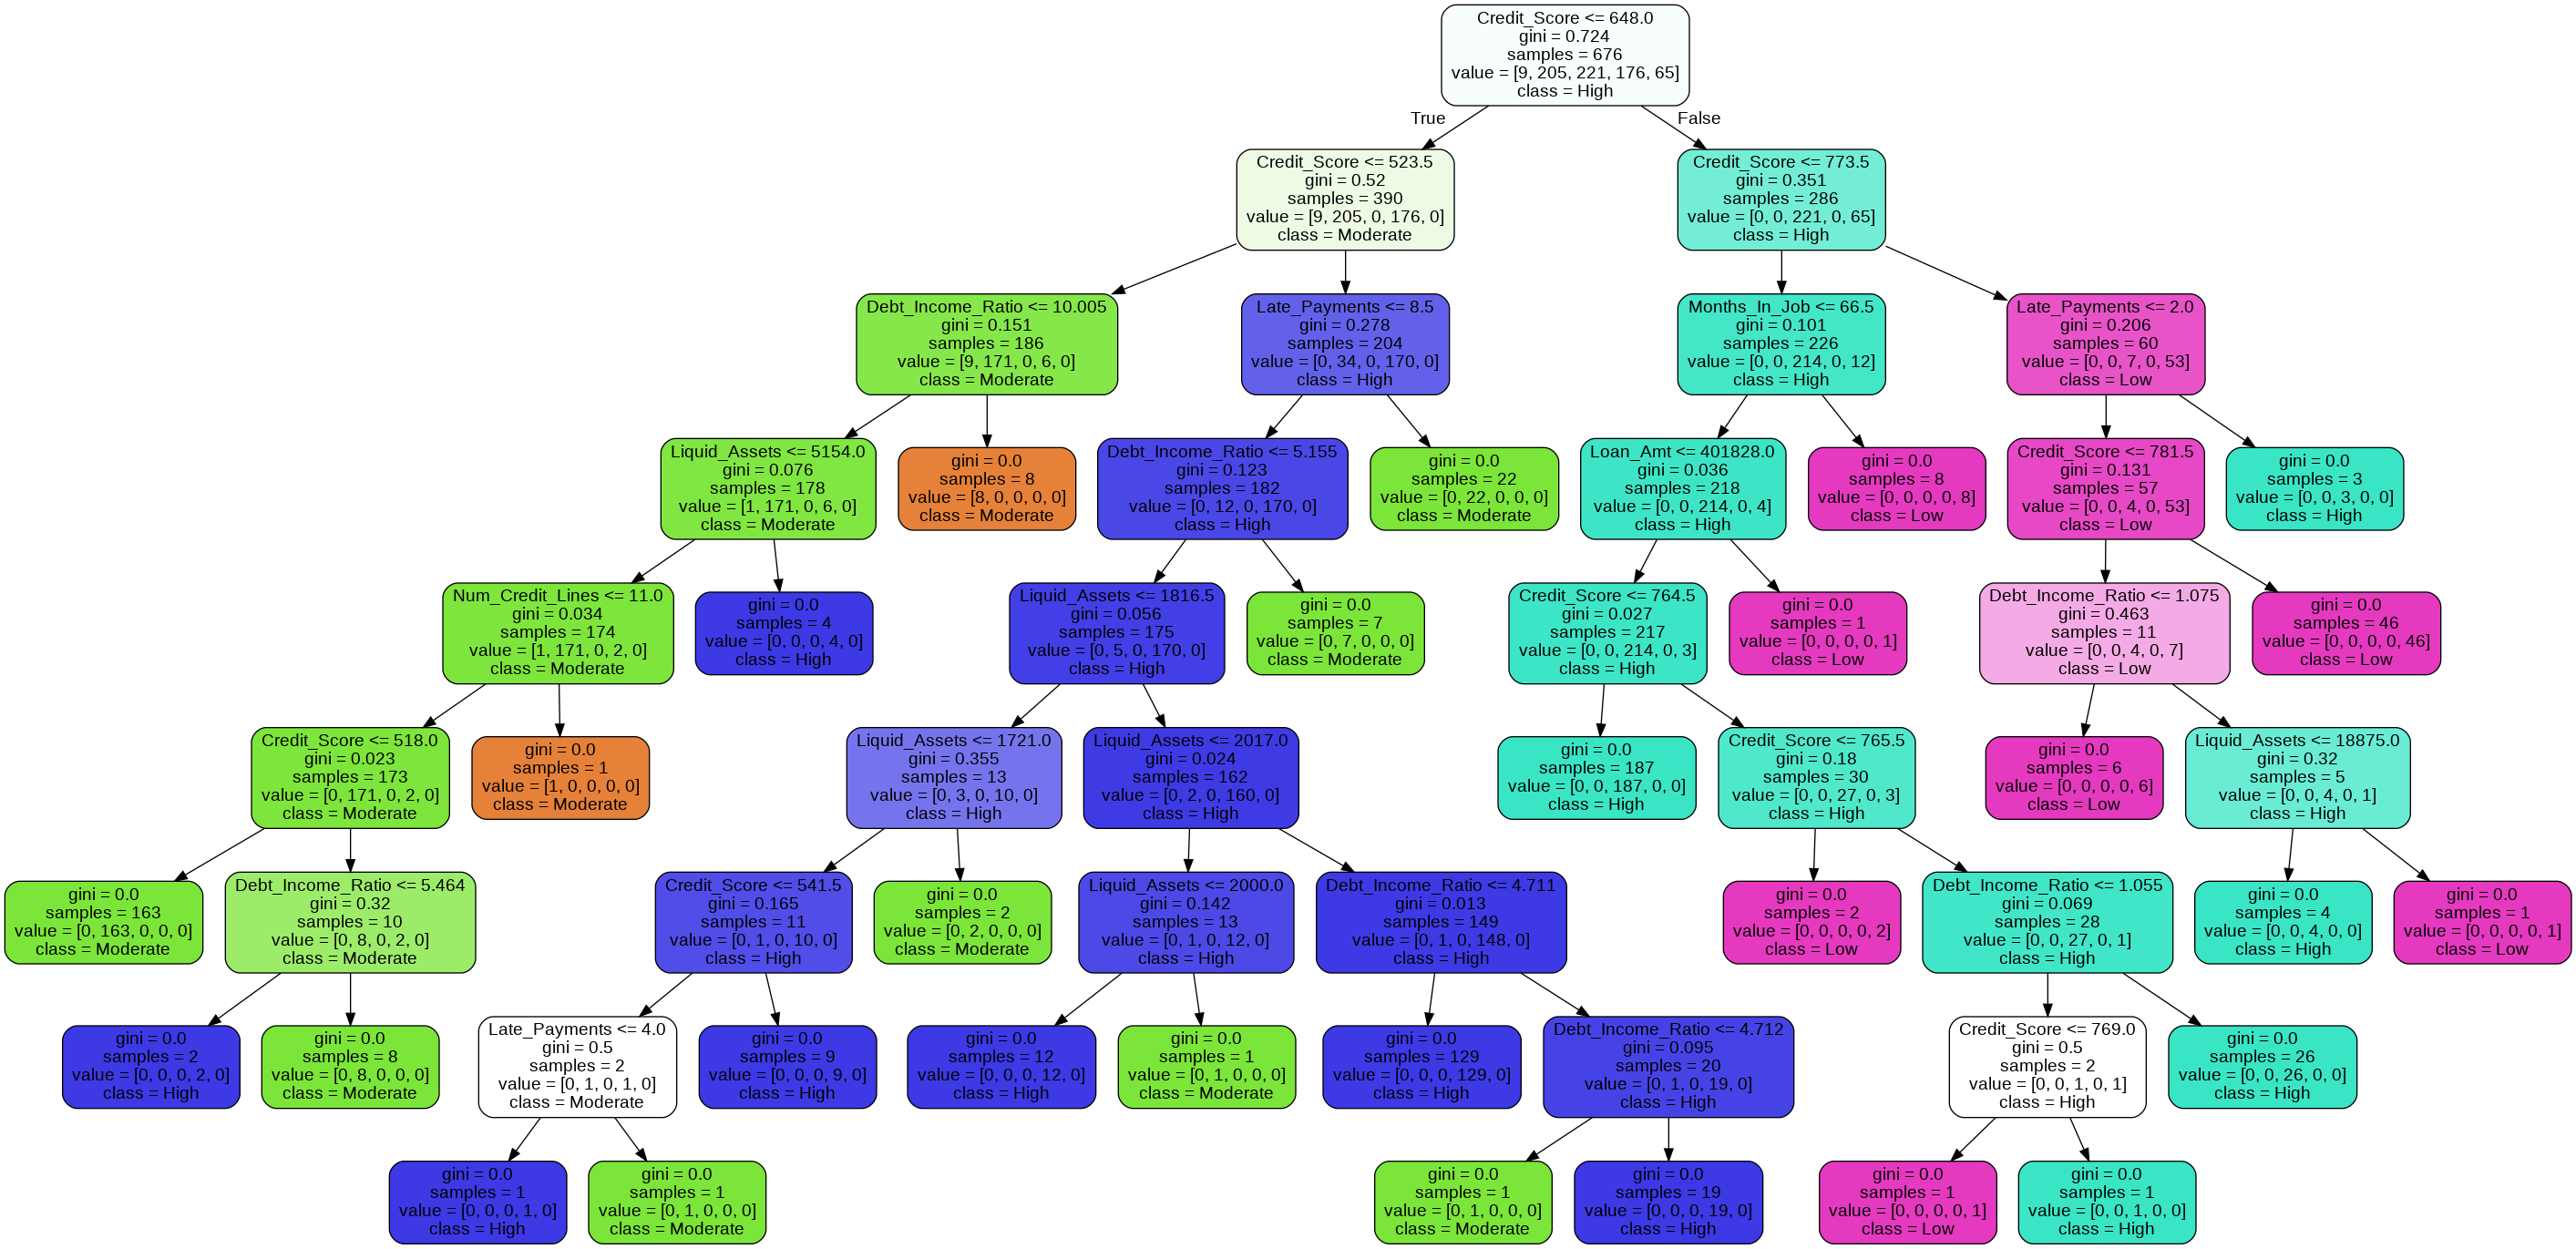

In [13]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(
    tree_model,
    out_file = None,
    feature_names = list(X.columns.values),
    class_names = list(y.values),
    rounded = True,
    filled = True
)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())